In [1]:
import numpy as np
import pandas as pd

#archivo=pd.read_csv(r'C:\Users\dfrigerio\Documents\Curso DS\TP FINAL\Lucho tesis\solo_patyvida.csv')
archivo=pd.read_csv('/home/diego/Escritorio/Lucho tesis/solo_patyvida.csv')

In [2]:
#Borrar columnas 21, que tienen siempre valor 0, la del tipo y las y2
archivo.drop(labels=['1-21','2-21','3-21','4-21','5-21','6-21','7-21','8-21','tipo','y2'], axis=1,inplace=True)

In [3]:
#Unificar los % de deficit o superavit en una sola columna 33 y 34 en %def. Luego borramos las columnas que usamos
archivo['1-d_c']=np.where(archivo['1-33']==0,archivo['1-34'],archivo['1-33'])
archivo['2-d_c']=np.where(archivo['2-33']==0,archivo['2-34'],archivo['2-33'])
archivo['3-d_c']=np.where(archivo['3-33']==0,archivo['3-34'],archivo['3-33'])
archivo['4-d_c']=np.where(archivo['4-33']==0,archivo['4-34'],archivo['4-33'])
archivo['5-d_c']=np.where(archivo['5-33']==0,archivo['5-34'],archivo['5-33'])
archivo['6-d_c']=np.where(archivo['6-33']==0,archivo['6-34'],archivo['6-33'])
archivo['7-d_c']=np.where(archivo['7-33']==0,archivo['7-34'],archivo['7-33'])
archivo['8-d_c']=np.where(archivo['8-33']==0,archivo['8-34'],archivo['8-33'])

archivo.drop(labels=['1-33','2-33','3-33','4-33','5-33','6-33','7-33','8-33',
                    '1-34','2-34','3-34','4-34','5-34','6-34','7-34','8-34'], axis=1, inplace=True)

#La sigla d_c, corresponde a % de déficit o % superavit, negativo para déficit y positivo para cobertura

In [ ]:
archivo.head()

In [4]:
len(archivo['cod_cia'].unique())

144

In [4]:
#Definimos las variables
X=archivo.iloc[:,((archivo.columns!='y')&(archivo.columns!='cod_cia')&(archivo.columns!='bloque'))].copy()
y=archivo['y'].copy()

In [5]:
#Definicion del set de TEST. Es decir, nunca se entrenan datos ni buscan hiperparámetros con estos datos. Solo para testeo
X_test=X.iloc[2678:].copy()
y_test=y[2678:].copy()

<h2>Regresión Logística</h2>

In [6]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

<p>Se definen los diferentes bloques de acuerdo a la cantidad de años/trimestres que se toman </p>

In [7]:
#5 bloques
X5_train=X.iloc[np.arange(1565,2253)].copy()
y5_train=y[1565:2253].copy()

#6 bloques
X6_train=X.iloc[np.arange(1431,2253)].copy()
y6_train=y[1431:2253].copy()

#7 bloques
X7_train=X.iloc[np.arange(1297,2253)].copy()
y7_train=y[1297:2253].copy()

#8 bloques
X8_train=X.iloc[np.arange(1163,2253)].copy()
y8_train=y[1163:2253].copy()

<p>Instanciamos los modelos para probar en test cada bloque, y luego de hacer el fit, imprimimos los resultados</p>

In [25]:
logic_reg5=LogisticRegression()
logic_reg5.fit(X5_train,y5_train)
#Guardamos las varialbes para ver resultados en gráficos
fplog5,tplog5,_=metrics.roc_curve(y_true=y_test,y_score=logic_reg5.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=logic_reg5.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=logic_reg5.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=logic_reg5.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.86      0.97      0.91       124
          1       0.00      0.00      0.00        20

avg / total       0.74      0.83      0.78       144

[[120   4]
 [ 20   0]]
0.5040322580645161


In [ ]:
logic_reg6=LogisticRegression()
logic_reg6.fit(X6_train,y6_train)
#Guardamos las varialbes para ver resultados en gráficos
fplog6,tplog6,_=metrics.roc_curve(y_true=y_test,y_score=logic_reg6.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=logic_reg6.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=logic_reg6.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=logic_reg6.predict_proba(X_test)[:,1]))

In [ ]:
logic_reg7=LogisticRegression()
logic_reg7.fit(X7_train,y7_train)
#Guardamos las varialbes para ver resultados en gráficos
fplog7,tplog7,_=metrics.roc_curve(y_true=y_test,y_score=logic_reg7.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=logic_reg7.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=logic_reg7.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=logic_reg7.predict_proba(X_test)[:,1]))

In [ ]:
logic_reg8=LogisticRegression()
logic_reg8.fit(X8_train,y8_train)
#Guardamos las varialbes para ver resultados en gráficos
fplog8,tplog8,_=metrics.roc_curve(y_true=y_test,y_score=logic_reg8.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=logic_reg8.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=logic_reg8.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=logic_reg8.predict_proba(X_test)[:,1]))

<h2>Naive Bayes</h2>

In [26]:
from sklearn.naive_bayes import GaussianNB

<p>Instanciamos los modelos para probar en test cada bloque, y luego de hacer el fit, imprimimos los resultados</p>

In [27]:
naive5=GaussianNB()
naive5.fit(X5_train,y5_train)
#Guardamos las varialbes para ver resultados en gráficos
fpnv5,tpnv5,_=metrics.roc_curve(y_true=y_test,y_score=naive5.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=naive5.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=naive5.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=naive5.predict_proba(X_test)[:,1]))

             precision    recall  f1-score   support

          0       0.77      0.14      0.23       124
          1       0.12      0.75      0.21        20

avg / total       0.68      0.22      0.23       144

[[ 17 107]
 [  5  15]]
0.44112903225806455


In [ ]:
naive6=GaussianNB()
naive6.fit(X6_train,y6_train)
#Guardamos las varialbes para ver resultados en gráficos
fpnv6,tpnv6,_=metrics.roc_curve(y_true=y_test,y_score=naive6.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=naive6.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=naive6.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=naive6.predict_proba(X_test)[:,1]))

In [ ]:
naive7=GaussianNB()
naive7.fit(X7_train,y7_train)
#Guardamos las varialbes para ver resultados en gráficos
fpnv7,tpnv7,_=metrics.roc_curve(y_true=y_test,y_score=naive7.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=naive7.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=naive7.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=naive7.predict_proba(X_test)[:,1]))

In [ ]:
naive8=GaussianNB()
naive8.fit(X8_train,y8_train)
#Guardamos las varialbes para ver resultados en gráficos
fpnv8,tpnv8,_=metrics.roc_curve(y_true=y_test,y_score=naive8.predict_proba(X_test)[:,1])
#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=naive8.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=naive8.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=naive8.predict_proba(X_test)[:,1]))

<h2>Support Vector Machine (SVM)</h2>

<p>Para este modelo, ya es necesario buscar Hiperparámetros. Para lo cual, se utilizan datos previos, con el fin de obtener los mejores Hiperparámetros, y luego entrenar el modelo para su posterior testeo.</p>

In [8]:
from sklearn.svm import SVC

In [9]:
#Definimos las k-fold para los diferentes escenarios
#5 periodos
custom_cv5=list(zip([np.arange(0,643),np.arange(128,773),np.arange(256,903),np.arange(384,1033),np.arange(513,1163),
                   np.arange(643,1297),np.arange(773,1431),np.arange(903,1565)],
                   [np.arange(1033,1163),np.arange(1163,1297),np.arange(1297,1431),np.arange(1431,1565),np.arange(1565,1699),
                   np.arange(1699,1834),np.arange(1834,1971),np.arange(1971,2112)]))
#6 periodos
custom_cv6=list(zip([np.arange(0,773),np.arange(128,903),np.arange(256,1033),np.arange(384,1163),np.arange(513,1297),
                   np.arange(643,1431)],
                   [np.arange(1163,1297),np.arange(1297,1431),np.arange(1431,1565),np.arange(1565,1699),
                   np.arange(1699,1834),np.arange(1834,1971)]))
#7 periodos
custom_cv7=list(zip([np.arange(0,903),np.arange(128,1033),np.arange(256,1163),np.arange(384,1297)],
                [np.arange(1297,1431),np.arange(1431,1565),np.arange(1565,1699),np.arange(1699,1834)]))
#8 periodos
custom_cv8=list(zip([np.arange(0,1033),np.arange(128,1163)],
                   [np.arange(1431,1565),np.arange(1565,1699)]))

In [34]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [12]:
#Hiperparámetros a probar para el SVM
param_svm={'kernel':['rbf','linear'],
          'C':[1, 5, 10, 50],
          'gamma':[0.001, 0.05,0.1, 0.15]}

<h4> Prueba con 5 períodos </h4>

In [ ]:
#Buscamos los hiperparametros óptimos
grid_svm_5=GridSearchCV(SVC(),param_svm,scoring='roc_auc',cv=custom_cv5,verbose=2,n_jobs=4)
grid_svm_5.fit(X,y)

print(grid_svm_5.best_params_) 
print(grid_svm_5.best_score_)

In [10]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test

svm5=SVC(C= 10, gamma= 0.001, kernel= 'rbf',probability=True)
svm5.fit(X5_train,y5_train)

#Guardamos las varialbes para ver resultados en gráficos
fpsmv5,tpsmv5,_=metrics.roc_curve(y_true=y_test,y_score=svm5.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=svm5.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=svm5.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=svm5.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       124
           1       0.78      0.35      0.48        20

   micro avg       0.90      0.90      0.90       144
   macro avg       0.84      0.67      0.71       144
weighted avg       0.89      0.90      0.88       144

[[122   2]
 [ 13   7]]
0.8776209677419354


<h4> Prueba con 6 períodos </h4>

In [ ]:
#Buscamos los hiperparametros óptimos
grid_svm_6=GridSearchCV(SVC(),param_svm,scoring='roc_auc',cv=custom_cv6,verbose=2,n_jobs=4)
grid_svm_6.fit(X,y)

print(grid_svm_6.best_params_) 
print(grid_svm_6.best_score_)

In [12]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
svm6=SVC(C=10,gamma=0.001,kernel='rbf', probability=True)
svm6.fit(X6_train,y6_train)

#Guardamos las varialbes para ver resultados en gráficos
fpsmv6,tpsmv6,_=metrics.roc_curve(y_true=y_test,y_score=svm6.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=svm6.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=svm6.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=svm6.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       124
           1       0.88      0.35      0.50        20

   micro avg       0.90      0.90      0.90       144
   macro avg       0.89      0.67      0.72       144
weighted avg       0.90      0.90      0.88       144

[[123   1]
 [ 13   7]]
0.8711693548387097


<h4> Prueba con 7 períodos </h4>

In [ ]:
#Buscamos los hiperparametros óptimos
grid_svm_7=GridSearchCV(SVC(),param_svm,scoring='roc_auc',cv=custom_cv7,verbose=2,n_jobs=4)
grid_svm_7.fit(X,y)

print(grid_svm_7.best_params_) 
print(grid_svm_7.best_score_)

In [13]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
svm7=SVC(C=20,gamma=0.001,kernel='rbf', probability=True)# ver resultados
svm7.fit(X7_train,y7_train)

#Guardamos las varialbes para ver resultados en gráficos
fpsmv7,tpsmv7,_=metrics.roc_curve(y_true=y_test,y_score=svm7.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=svm7.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=svm7.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=svm7.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       124
           1       1.00      0.40      0.57        20

   micro avg       0.92      0.92      0.92       144
   macro avg       0.96      0.70      0.76       144
weighted avg       0.92      0.92      0.90       144

[[124   0]
 [ 12   8]]
0.8915322580645161


<h4> Prueba con 8 períodos </h4>

In [ ]:
#Buscamos los hiperparametros óptimos
grid_svm_8=GridSearchCV(SVC(),param_svm,scoring='roc_auc',cv=custom_cv8,verbose=2,n_jobs=4)
grid_svm_8.fit(X,y)

print(grid_svm_8.best_params_) 
print(grid_svm_8.best_score_)

In [14]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
svm8=SVC(C=18,gamma=0.001,kernel='rbf', probability=True)# ver resultados
svm8.fit(X7_train,y7_train)

#Guardamos las varialbes para ver resultados en gráficos
fpsmv8,tpsmv8,_=metrics.roc_curve(y_true=y_test,y_score=svm8.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=svm8.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=svm8.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=svm8.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       124
           1       1.00      0.40      0.57        20

   micro avg       0.92      0.92      0.92       144
   macro avg       0.96      0.70      0.76       144
weighted avg       0.92      0.92      0.90       144

[[124   0]
 [ 12   8]]
0.8911290322580645


<h3>Grafico Resumen - SVM</h3>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set('talk', 'whitegrid', 'dark', font_scale=1, font='serif',
        rc={"lines.linewidth": 1, 'grid.linestyle': '--'},)

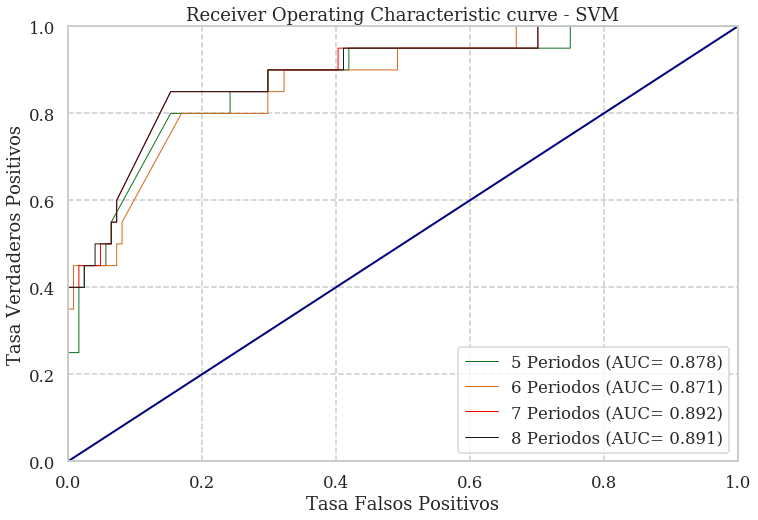

In [26]:
plt.figure(figsize=(12,8))
plt.plot(fpsmv5,tpsmv5, color='g',
         lw=1, label='5 Periodos (AUC= %0.3f)' % metrics.auc(fpsmv5,tpsmv5))
plt.plot(fpsmv6,tpsmv6, color='chocolate',
         lw=1, label='6 Periodos (AUC= %0.3f)' % metrics.auc(fpsmv6,tpsmv6))
plt.plot(fpsmv7,tpsmv7, color='red',
         lw=1, label='7 Periodos (AUC= %0.3f)' % metrics.auc(fpsmv7,tpsmv7))
plt.plot(fpsmv8,tpsmv8, color='k',
         lw=1, label='8 Periodos (AUC= %0.3f)' % metrics.auc(fpsmv8,tpsmv8))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Receiver Operating Characteristic curve - SVM')
plt.legend()#(loc="right")
plt.show()

In [18]:
#Guardamos los resultados por pruebas
rango=np.arange(2678,2822)

result_7p_svm=pd.DataFrame(data={'prueba':1,
                    'cia':archivo.loc[rango,:]['cod_cia'],
                    'score':svm7.predict_proba(X_test)[:,1],'real':y_test},index=rango)
#Aca se generan los resultados de "score" para luego definir los umbrales

#Varias columnas para umbrales de 15,20,25 y 30
result_7p_svm['15']=result_7p_svm['score'].apply(lambda x: 1 if x>0.15 else 0)
result_7p_svm['20']=result_7p_svm['score'].apply(lambda x: 1 if x>0.20 else 0)
result_7p_svm['25']=result_7p_svm['score'].apply(lambda x: 1 if x>0.25 else 0)
result_7p_svm['30']=result_7p_svm['score'].apply(lambda x: 1 if x>0.30 else 0)

''

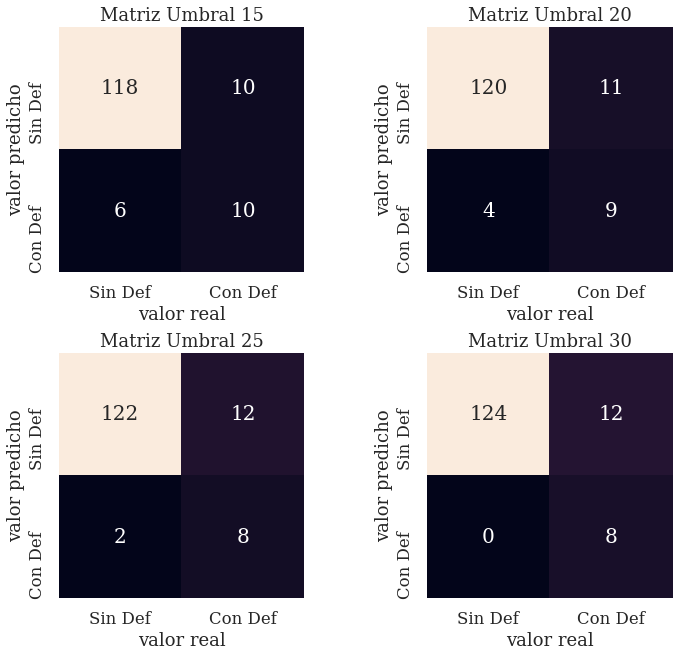

In [19]:
base_svm=result_7p_svm['real']

#El gráfico
plt.figure(figsize=(11,11))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(2,2,1) #Matriz umbral al 15
sb.heatmap(metrics.confusion_matrix(base_svm,y_pred=result_7p_svm['15']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 15')

plt.subplot(2,2,2) #Matriz umbral al 15
sb.heatmap(metrics.confusion_matrix(base_svm,y_pred=result_7p_svm['20']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 20')

plt.subplot(2,2,3) #Matriz umbral al 25
sb.heatmap(metrics.confusion_matrix(base_svm,y_pred=result_7p_svm['25']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 25')

plt.subplot(2,2,4) #Matriz umbral al 30
sb.heatmap(metrics.confusion_matrix(base_svm,y_pred=result_7p_svm['30']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 30')
;

In [20]:
#Tener en cuenta que 20 compañias tienen déficit y 124 no. De ahi comparar cual predice mejor o "agarra" mas cias
result_7p_svm['real'].value_counts()

0    124
1     20
Name: real, dtype: int64

<h2>Random Forest (RF)</h2>

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
#Hiperparámetros a probar para el Random Forest
param_rf={'class_weight':[{1:0.75,0:0.25},{1:0.8,0:0.2}],
                'n_estimators': [100, 200,300], 
               'max_features': [10,30,70,120], 
               'max_depth': [5, 20, 30, 50], 
               'min_samples_leaf':[1,5,10,30]}

In [13]:
#Instacia del modelo y definicion de parametros a probar
rf = RandomForestClassifier(random_state=23)

In [19]:
grid_rf_5=GridSearchCV(rf,param_rf,scoring='roc_auc',cv=custom_cv5,verbose=1,n_jobs=4)
grid_rf_5.fit(X,y)

Fitting 8 folds for each of 384 candidates, totalling 3072 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   34.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 15.7min
[Parallel(n_jobs=4)]: Done 3072 out of 3072 | elapsed: 20.3min finished


GridSearchCV(cv=[(array([  0,   1, ..., 641, 642]), array([1033, 1034, ..., 1161, 1162])), (array([128, 129, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([256, 257, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 384,  385, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564]...5, ..., 1969, 1970])), (array([ 903,  904, ..., 1563, 1564]), array([1971, 1972, ..., 2110, 2111]))],
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'class_weight': [{1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimat

In [22]:
print(grid_rf_5.best_params_)

{'class_weight': {1: 0.8, 0: 0.2}, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 10, 'n_estimators': 100}


In [22]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
rf5=RandomForestClassifier(class_weight= {1: 0.8, 0: 0.2}, max_depth= 20,max_features=10, 
                           min_samples_leaf=10, n_estimators=100,random_state=23)# ver resultados
rf5.fit(X5_train,y5_train)

#Guardamos las varialbes para ver resultados en gráficos
fprf5,tprf5,_=metrics.roc_curve(y_true=y_test,y_score=rf5.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=rf5.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=rf5.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=rf5.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       124
           1       0.91      0.50      0.65        20

   micro avg       0.92      0.92      0.92       144
   macro avg       0.92      0.75      0.80       144
weighted avg       0.92      0.92      0.91       144

[[123   1]
 [ 10  10]]
0.8903225806451612


<h4> Prueba con 6 períodos </h4>

In [14]:
grid_rf_6=GridSearchCV(rf,param_rf,scoring='roc_auc',cv=custom_cv6,verbose=1,n_jobs=4)
grid_rf_6.fit(X,y)

print(grid_rf_6.best_params_)

Fitting 6 folds for each of 384 candidates, totalling 2304 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   59.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 10.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 2304 out of 2304 | elapsed: 19.6min finished


{'class_weight': {1: 0.8, 0: 0.2}, 'max_depth': 5, 'max_features': 70, 'min_samples_leaf': 10, 'n_estimators': 300}


In [23]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
rf6=RandomForestClassifier(class_weight= {1: 0.8, 0: 0.2}, max_depth= 5,max_features=70, 
                           min_samples_leaf=10, n_estimators=300,random_state=23)# ver resultados
rf6.fit(X6_train,y6_train)

#Guardamos las varialbes para ver resultados en gráficos
fprf6,tprf6,_=metrics.roc_curve(y_true=y_test,y_score=rf6.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=rf6.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=rf6.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=rf6.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       124
           1       0.79      0.55      0.65        20

   micro avg       0.92      0.92      0.92       144
   macro avg       0.86      0.76      0.80       144
weighted avg       0.91      0.92      0.91       144

[[121   3]
 [  9  11]]
0.8862903225806451


<h4> Prueba con 7 períodos </h4>

In [21]:
grid_rf_7=GridSearchCV(rf,param_rf,scoring='roc_auc',cv=custom_cv7,verbose=1,n_jobs=4)
grid_rf_7.fit(X,y)

print(grid_rf_7.best_params_)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 12.5min
[Parallel(n_jobs=4)]: Done 1536 out of 1536 | elapsed: 16.0min finished


{'class_weight': {1: 0.8, 0: 0.2}, 'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 1, 'n_estimators': 200}


In [24]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
rf7=RandomForestClassifier(class_weight= {1: 0.8, 0: 0.2}, max_depth= 5,max_features=30, 
                           min_samples_leaf=1, n_estimators=200,random_state=23)# ver resultados
rf7.fit(X7_train,y7_train)

#Guardamos las varialbes para ver resultados en gráficos
fprf7,tprf7,_=metrics.roc_curve(y_true=y_test,y_score=rf7.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=rf7.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=rf7.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=rf7.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       124
           1       0.90      0.45      0.60        20

   micro avg       0.92      0.92      0.92       144
   macro avg       0.91      0.72      0.78       144
weighted avg       0.92      0.92      0.90       144

[[123   1]
 [ 11   9]]
0.8766129032258064


<h4> Prueba con 8 períodos </h4>

In [23]:
grid_rf_8=GridSearchCV(rf,param_rf,scoring='roc_auc',cv=custom_cv8,verbose=1,n_jobs=4)
grid_rf_8.fit(X,y)

print(grid_rf_8.best_params_)

Fitting 2 folds for each of 384 candidates, totalling 768 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 768 out of 768 | elapsed:  9.6min finished


{'class_weight': {1: 0.75, 0: 0.25}, 'max_depth': 5, 'max_features': 70, 'min_samples_leaf': 5, 'n_estimators': 100}


In [25]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
rf8=RandomForestClassifier(class_weight= {1: 0.75, 0: 0.25}, max_depth= 5,max_features=70, 
                           min_samples_leaf=5, n_estimators=300,random_state=23)# ver resultados
rf8.fit(X8_train,y8_train)

#Guardamos las varialbes para ver resultados en gráficos
fprf8,tprf8,_=metrics.roc_curve(y_true=y_test,y_score=rf8.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=rf8.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=rf8.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=rf8.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       124
           1       0.92      0.55      0.69        20

   micro avg       0.93      0.93      0.93       144
   macro avg       0.92      0.77      0.82       144
weighted avg       0.93      0.93      0.92       144

[[123   1]
 [  9  11]]
0.8818548387096775


<h3>Grafico Resumen - Random Forest</h3>

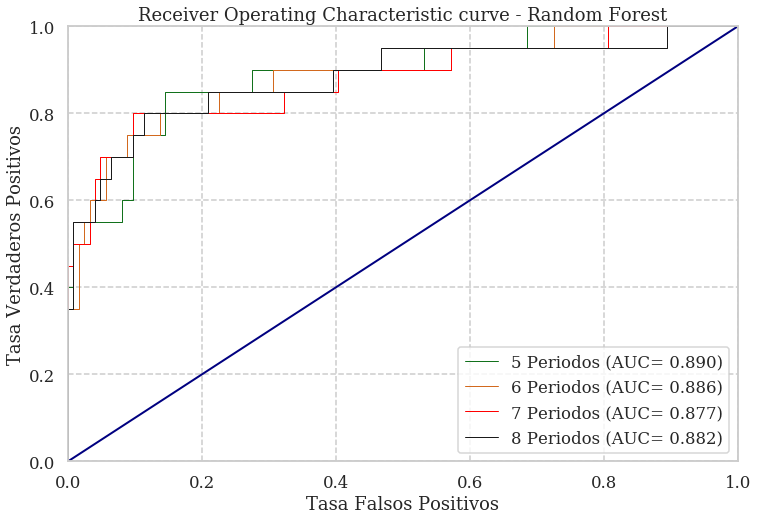

In [27]:
plt.figure(figsize=(12,8))
plt.plot(fprf5,tprf5, color='g',
         lw=1, label='5 Periodos (AUC= %0.3f)' % metrics.auc(fprf5,tprf5))
plt.plot(fprf6,tprf6, color='chocolate',
         lw=1, label='6 Periodos (AUC= %0.3f)' % metrics.auc(fprf6,tprf6))
plt.plot(fprf7,tprf7, color='red',
         lw=1, label='7 Periodos (AUC= %0.3f)' % metrics.auc(fprf7,tprf7))
plt.plot(fprf8,tprf8, color='k',
         lw=1, label='8 Periodos (AUC= %0.3f)' % metrics.auc(fprf8,tprf8))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Receiver Operating Characteristic curve - Random Forest')
plt.legend()#(loc="right")
plt.show()

In [28]:
#Guardamos los resultados por pruebas
#rango=np.arange(2678,2822) este es el mismo rango por eso no lo defino

result_5p_rf=pd.DataFrame(data={'prueba':1,
                    'cia':archivo.loc[rango,:]['cod_cia'],
                    'score':rf5.predict_proba(X_test)[:,1],'real':y_test},index=rango) #si se quiere hacer otro período habria que cambiar aca el modelo por rf6, rf7 o rf8

#Aca se generan los resultados de "score" para luego definir los umbrales

#Varias columnas para umbrales de 15,20,25 y 30
result_5p_rf['15']=result_5p_rf['score'].apply(lambda x: 1 if x>0.15 else 0)
result_5p_rf['20']=result_5p_rf['score'].apply(lambda x: 1 if x>0.20 else 0)
result_5p_rf['25']=result_5p_rf['score'].apply(lambda x: 1 if x>0.25 else 0)
result_5p_rf['30']=result_5p_rf['score'].apply(lambda x: 1 if x>0.30 else 0)

''

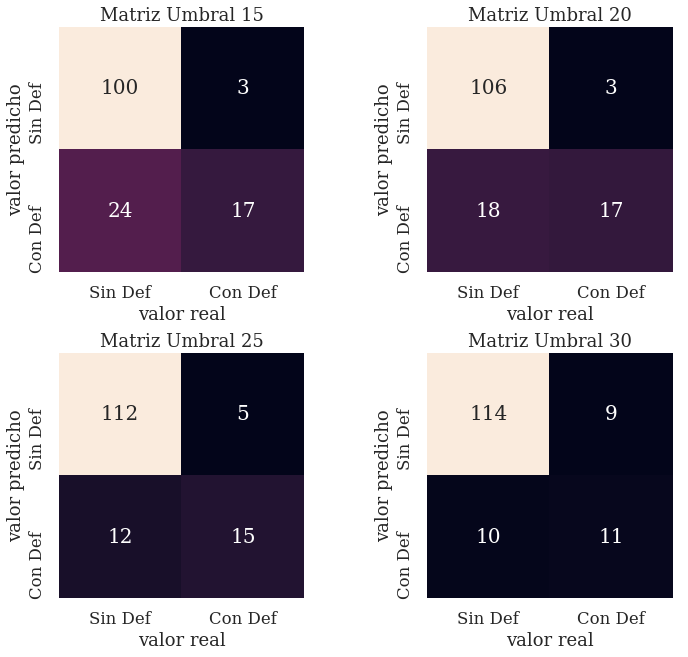

In [29]:
base_rf=result_5p_rf['real']

#El gráfico
plt.figure(figsize=(11,11))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(2,2,1) #Matriz umbral al 15
sb.heatmap(metrics.confusion_matrix(base_rf,y_pred=result_5p_rf['15']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 15')

plt.subplot(2,2,2) #Matriz umbral al 15
sb.heatmap(metrics.confusion_matrix(base_rf,y_pred=result_5p_rf['20']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 20')

plt.subplot(2,2,3) #Matriz umbral al 25
sb.heatmap(metrics.confusion_matrix(base_rf,y_pred=result_5p_rf['25']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 25')

plt.subplot(2,2,4) #Matriz umbral al 30
sb.heatmap(metrics.confusion_matrix(base_rf,y_pred=result_5p_rf['30']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 30')
;

<h2>Light GBM</h2>

In [30]:
import lightgbm as lgb
import scipy.stats as st

In [31]:
#Parametros a Probar

one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1
parametros_lgb = {  
    'class_weight':[{1:0.7,0:0.3},{1:0.75,0:0.25},{1:0.8,0:0.2}],
    "n_estimators": st.randint(100,330), # Number of boosted trees to fit.
    "max_depth": st.randint(5, 50),  # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [32]:
#Instaciamos el modelo
model_lgb = lgb.LGBMClassifier(random_state=23)

In [35]:
ligth_rn_5=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv5,scoring='roc_auc', 
                              verbose= 1,n_jobs=6)
ligth_rn_5.fit(X,y)

Fitting 8 folds for each of 400 candidates, totalling 3200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   12.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   26.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   46.4s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 3200 out of 3200 | elapsed:  3.1min finished
/home/diego/anaconda3/envs/mldiego/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=[(array([  0,   1, ..., 641, 642]), array([1033, 1034, ..., 1161, 1162])), (array([128, 129, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([256, 257, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 384,  385, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564]...5, ..., 1969, 1970])), (array([ 903,  904, ..., 1563, 1564]), array([1971, 1972, ..., 2110, 2111]))],
          error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=23, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=400, n_jobs=6,
          param_distributions

In [36]:
print(ligth_rn_5.best_params_)

{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.6387527547429492, 'gamma': 7.5620407793915065, 'learning_rate': 0.3411915295846979, 'max_depth': 18, 'min_child_weight': 5.150871277565946, 'n_estimators': 141, 'reg_alpha': 0.7664423651834851, 'subsample': 0.9779498222868851}


In [37]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
lgbm5 = ligth_rn_5.best_estimator_
lgbm5.fit(X5_train,y5_train)

#Guardamos las varialbes para ver resultados en gráficos
fplgb5,tplgb5,_=metrics.roc_curve(y_true=y_test,y_score=lgbm5.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=lgbm5.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=lgbm5.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=lgbm5.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       124
           1       0.73      0.55      0.63        20

   micro avg       0.91      0.91      0.91       144
   macro avg       0.83      0.76      0.79       144
weighted avg       0.90      0.91      0.90       144

[[120   4]
 [  9  11]]
0.8806451612903226


<h4> Prueba con 6 períodos </h4>

In [38]:
ligth_rn_6=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv6,scoring='roc_auc', 
                              verbose= 1,n_jobs=6)
ligth_rn_6.fit(X,y)

Fitting 6 folds for each of 400 candidates, totalling 2400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   12.9s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   53.9s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 2400 out of 2400 | elapsed:  2.7min finished
/home/diego/anaconda3/envs/mldiego/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=[(array([  0,   1, ..., 771, 772]), array([1163, 1164, ..., 1295, 1296])), (array([128, 129, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 256,  257, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 384,  385, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 513,  514, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833])), (array([ 643,  644, ..., 1429, 1430]), array([1834, 1835, ..., 1969, 1970]))],
          error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=23, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid

In [39]:
print(ligth_rn_6.best_params_)

{'class_weight': {1: 0.7, 0: 0.3}, 'colsample_bytree': 0.9619468919884062, 'gamma': 1.1923747189682665, 'learning_rate': 0.3726050912979561, 'max_depth': 24, 'min_child_weight': 7.884956971650446, 'n_estimators': 232, 'reg_alpha': 1.300664852622061, 'subsample': 0.9566198395939837}


In [40]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
lgbm6 = ligth_rn_6.best_estimator_
lgbm6.fit(X6_train,y6_train)

#Guardamos las varialbes para ver resultados en gráficos
fplgb6,tplgb6,_=metrics.roc_curve(y_true=y_test,y_score=lgbm6.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=lgbm6.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=lgbm6.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=lgbm6.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       124
           1       0.71      0.50      0.59        20

   micro avg       0.90      0.90      0.90       144
   macro avg       0.82      0.73      0.77       144
weighted avg       0.89      0.90      0.90       144

[[120   4]
 [ 10  10]]
0.8919354838709677


<h4> Prueba con 7 períodos </h4>

In [41]:
ligth_rn_7=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv7,scoring='roc_auc', 
                              verbose= 1,n_jobs=6)
ligth_rn_7.fit(X,y)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   34.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   58.8s
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1600 out of 1600 | elapsed:  2.0min finished
/home/diego/anaconda3/envs/mldiego/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=[(array([  0,   1, ..., 901, 902]), array([1297, 1298, ..., 1429, 1430])), (array([ 128,  129, ..., 1031, 1032]), array([1431, 1432, ..., 1563, 1564])), (array([ 256,  257, ..., 1161, 1162]), array([1565, 1566, ..., 1697, 1698])), (array([ 384,  385, ..., 1295, 1296]), array([1699, 1700, ..., 1832, 1833]))],
          error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=23, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=400, n_jobs=6,
          param_distributions={'class_weight': [{1: 0.7, 0: 0.3}, {1: 0.75, 0: 0.25}, {1: 0.8, 0: 0.2}], 'n_estimators': 

In [42]:
print(ligth_rn_7.best_params_)

{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.8389383779465004, 'gamma': 0.16289078469370888, 'learning_rate': 0.40113839781656946, 'max_depth': 20, 'min_child_weight': 6.893947175916208, 'n_estimators': 109, 'reg_alpha': 2.0689060196307594, 'subsample': 0.9233256201550217}


In [43]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
lgbm7 = ligth_rn_7.best_estimator_
lgbm7.fit(X7_train,y7_train)

#Guardamos las varialbes para ver resultados en gráficos
fplgb7,tplgb7,_=metrics.roc_curve(y_true=y_test,y_score=lgbm7.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=lgbm7.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=lgbm7.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=lgbm7.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       124
           1       0.69      0.55      0.61        20

   micro avg       0.90      0.90      0.90       144
   macro avg       0.81      0.75      0.78       144
weighted avg       0.90      0.90      0.90       144

[[119   5]
 [  9  11]]
0.8915322580645161


<h4> Prueba con 8 períodos </h4>

In [45]:
ligth_rn_8=RandomizedSearchCV(model_lgb, parametros_lgb, n_iter = 400, cv=custom_cv8,scoring='roc_auc', 
                              verbose= 1,n_jobs=6)
ligth_rn_8.fit(X,y)

print(ligth_rn_8.best_params_)

Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   35.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:  1.1min finished


{'class_weight': {1: 0.75, 0: 0.25}, 'colsample_bytree': 0.8095189612688216, 'gamma': 4.758993698567914, 'learning_rate': 0.30614199794707525, 'max_depth': 6, 'min_child_weight': 5.262033437143065, 'n_estimators': 175, 'reg_alpha': 0.8073268977275605, 'subsample': 0.9618402914889677}


In [46]:
#Con los hiperparametros encontrados, entrenamos el modelo y predecimos en test
lgbm8 = ligth_rn_8.best_estimator_
lgbm8.fit(X8_train,y8_train)

#Guardamos las varialbes para ver resultados en gráficos
fplgb8,tplgb8,_=metrics.roc_curve(y_true=y_test,y_score=lgbm8.predict_proba(X_test)[:,1])

#Imprimimos los resultados
print(metrics.classification_report(y_test,y_pred=lgbm8.predict(X_test)))
print(metrics.confusion_matrix(y_test,y_pred=lgbm8.predict(X_test)))
print(metrics.roc_auc_score(y_test,y_score=lgbm8.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       124
           1       0.77      0.50      0.61        20

   micro avg       0.91      0.91      0.91       144
   macro avg       0.85      0.74      0.78       144
weighted avg       0.90      0.91      0.90       144

[[121   3]
 [ 10  10]]
0.8959677419354839


<h3>Grafico Resumen - Light GBM</h3>

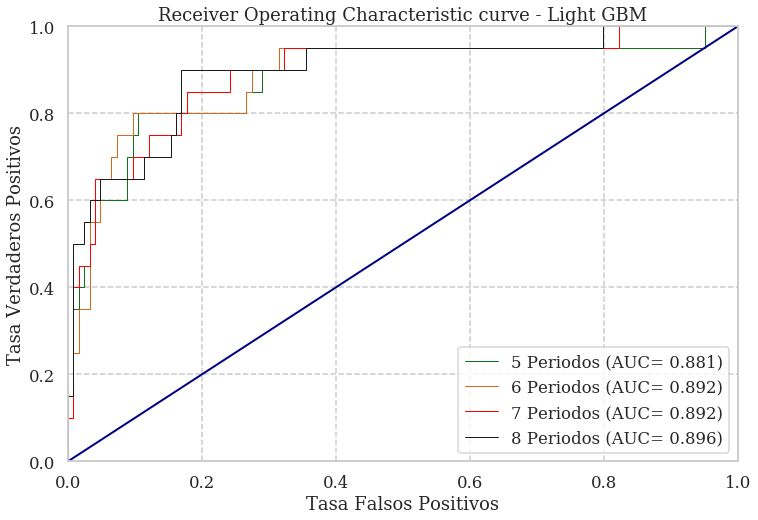

In [48]:
plt.figure(figsize=(12,8))
plt.plot(fplgb5,tplgb5, color='g',
         lw=1, label='5 Periodos (AUC= %0.3f)' % metrics.auc(fplgb5,tplgb5))
plt.plot(fplgb6,tplgb6, color='chocolate',
         lw=1, label='6 Periodos (AUC= %0.3f)' % metrics.auc(fplgb6,tplgb6))
plt.plot(fplgb7,tplgb7, color='red',
         lw=1, label='7 Periodos (AUC= %0.3f)' % metrics.auc(fplgb7,tplgb7))
plt.plot(fplgb8,tplgb8, color='k',
         lw=1, label='8 Periodos (AUC= %0.3f)' % metrics.auc(fplgb8,tplgb8))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Receiver Operating Characteristic curve - Light GBM')
plt.legend()#(loc="right")
plt.show()

In [49]:
#Guardamos los resultados por pruebas
#rango=np.arange(2678,2822) este es el mismo rango por eso no lo defino

result_8p_lgb=pd.DataFrame(data={'prueba':1,
                    'cia':archivo.loc[rango,:]['cod_cia'],
                    'score':lgbm8.predict_proba(X_test)[:,1],'real':y_test},index=rango) #si se quiere hacer otro período habria que cambiar aca el modelo por lgbm7, lgbm6 o lgbm5

#Aca se generan los resultados de "score" para luego definir los umbrales

#Varias columnas para umbrales de 15,20,25 y 30
result_8p_lgb['15']=result_8p_lgb['score'].apply(lambda x: 1 if x>0.15 else 0)
result_8p_lgb['20']=result_8p_lgb['score'].apply(lambda x: 1 if x>0.20 else 0)
result_8p_lgb['25']=result_8p_lgb['score'].apply(lambda x: 1 if x>0.25 else 0)
result_8p_lgb['30']=result_8p_lgb['score'].apply(lambda x: 1 if x>0.30 else 0)

''

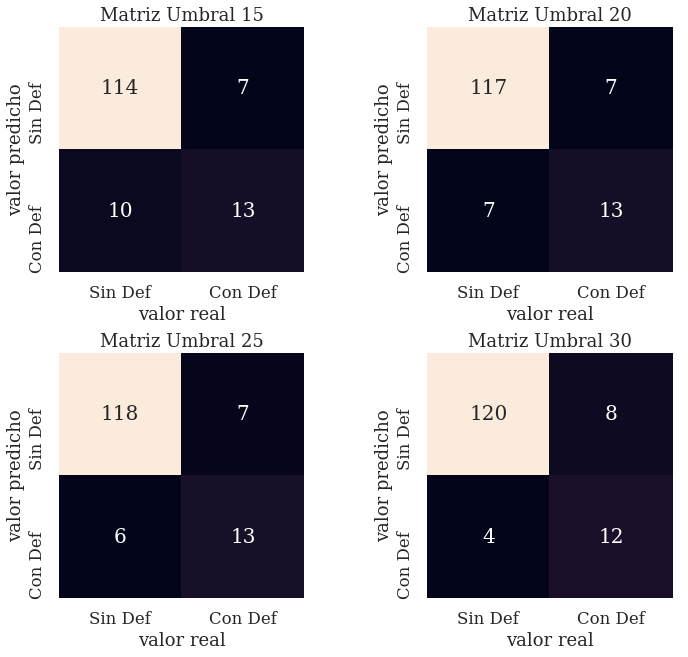

In [50]:
base_lgb=result_8p_lgb['real']

#El gráfico
plt.figure(figsize=(11,11))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(2,2,1) #Matriz umbral al 15
sb.heatmap(metrics.confusion_matrix(base_lgb,y_pred=result_8p_lgb['15']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 15')

plt.subplot(2,2,2) #Matriz umbral al 15
sb.heatmap(metrics.confusion_matrix(base_lgb,y_pred=result_8p_lgb['20']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 20')

plt.subplot(2,2,3) #Matriz umbral al 25
sb.heatmap(metrics.confusion_matrix(base_lgb,y_pred=result_8p_lgb['25']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 25')

plt.subplot(2,2,4) #Matriz umbral al 30
sb.heatmap(metrics.confusion_matrix(base_lgb,y_pred=result_8p_lgb['30']).T, 
square=True, annot=True, annot_kws={"size": 20},fmt='d', cbar=False,
            xticklabels=['Sin Def','Con Def'], yticklabels=['Sin Def','Con Def'])
plt.xlabel('valor real')
plt.ylabel('valor predicho')
plt.title('Matriz Umbral 30')
;